In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("sales_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Product,Category,Region,Units Sold,Unit Price
0,2026-01-01,Apple,Fruit,East,50,1.2
1,2026-01-01,Banana,Fruit,West,30,0.8
2,2026-01-02,Milk,Dairy,East,20,1.5
3,2026-01-03,Bread,Bakery,North,40,2.0
4,2026-01-04,Cheese,Dairy,South,15,3.5


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        6 non-null      datetime64[ns]
 1   Product     6 non-null      object        
 2   Category    6 non-null      object        
 3   Region      6 non-null      object        
 4   Units Sold  6 non-null      int64         
 5   Unit Price  6 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 420.0+ bytes


Date          0
Product       0
Category      0
Region        0
Units Sold    0
Unit Price    0
dtype: int64

In [4]:
# Total sales per row
df['Total Sales'] = df['Units Sold'] * df['Unit Price']
df.head()

,Date,Product,Category,Region,Units Sold,Unit Price,Total Sales
0,2026-01-01,Apple,Fruit,East,50,1.2,60.0
1,2026-01-01,Banana,Fruit,West,30,0.8,24.0
2,2026-01-02,Milk,Dairy,East,20,1.5,30.0
3,2026-01-03,Bread,Bakery,North,40,2.0,80.0
4,2026-01-04,Cheese,Dairy,South,15,3.5,52.5


In [5]:
product_sales = df.groupby('Product')['Total Sales'].sum().reset_index()
print(product_sales)


  Product  Total Sales
0   Apple        132.0
1  Banana         24.0
2   Bread         80.0
3  Cheese         52.5
4    Milk         30.0


In [6]:
region_sales = df.groupby('Region')['Total Sales'].sum().reset_index()
print(region_sales)

  Region  Total Sales
0   East         90.0
1  North         80.0
2  South         52.5
3   West         96.0


In [7]:
daily_sales = df.groupby('Date')['Total Sales'].sum().reset_index()
print(daily_sales)

        Date  Total Sales
0 2026-01-01         84.0
1 2026-01-02         30.0
2 2026-01-03         80.0
3 2026-01-04         52.5
4 2026-01-05         72.0


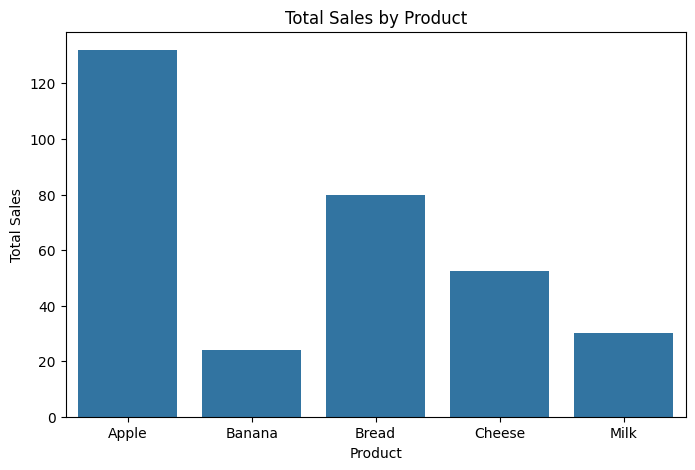

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x='Product', y='Total Sales', data=product_sales)
plt.title("Total Sales by Product")
plt.show()

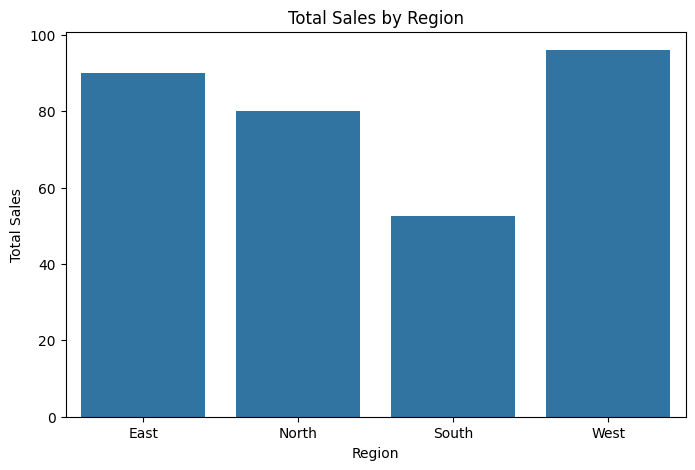

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Total Sales', data=region_sales)
plt.title("Total Sales by Region")
plt.show()


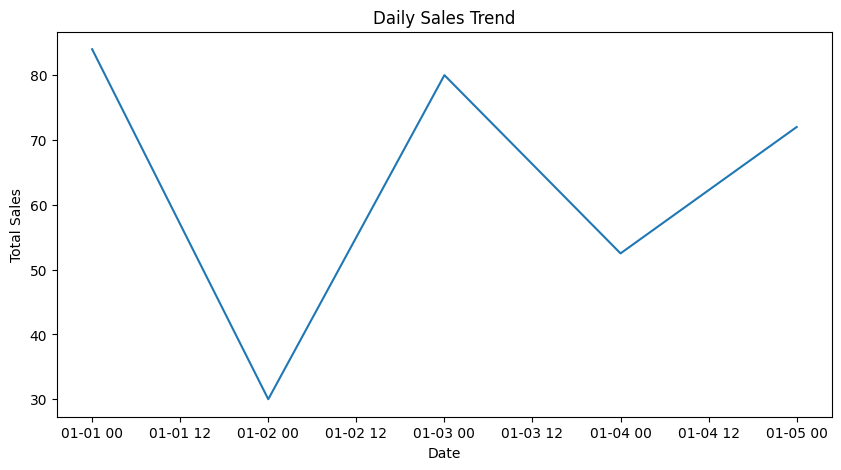

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Total Sales', data=daily_sales)
plt.title("Daily Sales Trend")
plt.show()


In [12]:
numeric_df = df.select_dtypes(include='number')


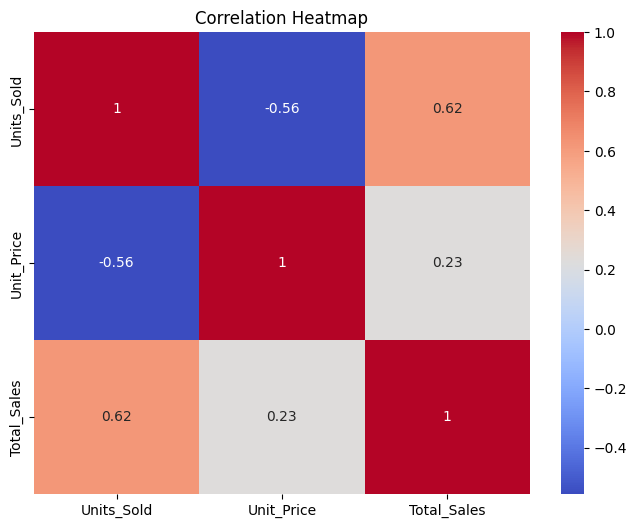

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Insights from Correlation Analysis
Total Sales shows a strong positive correlation with Units Sold, indicating that higher sales volume directly increases revenue.

Unit Price has a moderate impact on Total Sales, suggesting pricing also influences revenue but less than volume.
